# Benchmark 4 - Número de Hosts

## Setup do Ambiente

### Imports

In [1]:
from setup import *

# from jupyter_datatables import init_datatables_mode

# %load_ext jupyter_require

# %reload_ext jupyter_require
# %requirejs d3 https://d3js.org/d3.v5.min
# init_datatables_mode()

# %matplotlib inline
# matplotlib.style.use('ggplot')

### Load Data

In [2]:
folder_path = '../credentials/samples/Benchmark4/'
dfb4 = load_data(folder_path)

In [3]:
folder_path = '../credentials/samples/Benchmark5/'
dfb5 = load_data(folder_path)

In [4]:
df = pd.concat([dfb4,dfb5])
df.sample(10)

,RTT,Benchmark,NumberHosts,NumberSenders,NumberReceivers,MessageSize,NumberMessages
7,10,5,1,100,100,1000,10
6,8,5,1,100,100,1,10
6,4,5,1,100,100,100,10
8,6,5,1,100,100,1,10
2,3,5,1,100,100,100,10
6,8,4,2,100,100,100,10
5,3,5,1,100,100,1000,10
0,15,5,1,100,100,1000,10
9,3,4,2,100,100,100,10
4,2,4,2,100,100,100,10


## Experimentos

### Experimento B4E1 - Número de Pares de Agentes

In [5]:
b4e1 = df[df.MessageSize == 10]
b4e1 = b4e1[b4e1.NumberMessages == 10]
b4e1 = b4e1[["NumberHosts", "NumberSenders", "RTT"]]
b4e1

,NumberHosts,NumberSenders,RTT
0,2,100,2
1,2,100,2
2,2,100,3
3,2,100,1
4,2,100,2
5,2,100,3
6,2,100,4
7,2,100,2
8,2,100,5
9,2,100,3


In [6]:
plot_results(b4e1, yerror=False, legentOut=False, logScale=True,
             title='title', 
             x_label='Pares de Agentes', 
             x_column='NumberSenders')

KeyError: 'RTT_mean'

### Experimento B4E2 - Tamanho das Mensagens

In [11]:
b4e2 = df[df.Benchmark == 4]
b4e2 = b4e2[b4e2.NumberSenders == 100]
b4e2 = b4e2[b4e2.NumberMessages == 10]
b4e2 = b4e2[["MessageSize", "RTT"]]

b5e2 = df[df.Benchmark == 5]
b5e2 = b5e2[b5e2.NumberSenders == 100]
b5e2 = b5e2[b5e2.NumberMessages == 10]
b5e2 = b5e2[["MessageSize", "RTT"]]

In [12]:
b4e2 = b4e2.groupby(['MessageSize']).agg(['mean', 'min', 'max', 'std', 'count'])
b4e2.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std', 'Messages_Delivered']
b4e2 = b4e2.reset_index()

b5e2 = b5e2.groupby(['MessageSize']).agg(['mean', 'min', 'max', 'std', 'count'])
b5e2.columns = ['RTT_mean', 'RTT_min', 'RTT_max', 'RTT_std', 'Messages_Delivered']
b5e2 = b5e2.reset_index()
b5e2

,MessageSize,RTT_mean,RTT_min,RTT_max,RTT_std,Messages_Delivered
0,1,4.2,2,8,2.299758,10
1,10,2.2,1,4,1.032796,10
2,100,2.7,1,5,1.159502,10
3,1000,12.9,1,40,13.436683,10


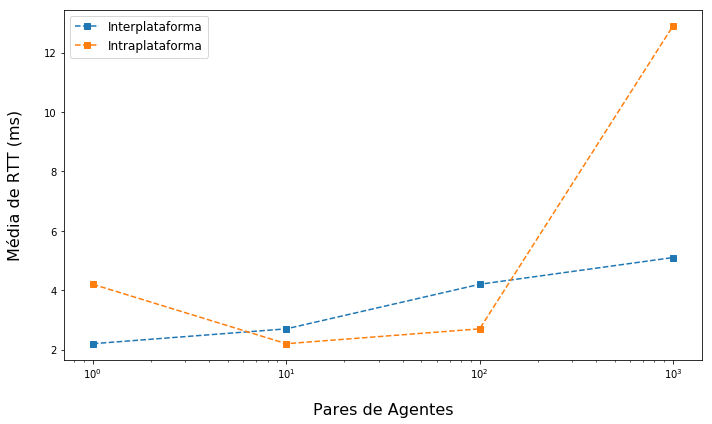

In [16]:
def plot_results2(dfs, title, x_label, x_column, legend, yerror=False, legentOut=False, logScale=False):

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_ylabel('Média de RTT (ms)\n', fontsize=16)
    ax.set_xlabel('\n'+x_label, fontsize=16)
    
    for df in dfs:
        if yerror:
            plt.errorbar(df[x_column], df['RTT_mean'], fmt='--s')
        else:
            plt.errorbar(df[x_column], df['RTT_mean'], fmt='--s')
        
    if logScale:
        ax.set_xscale('log')
    if legentOut:
        ax.legend(legend, loc='upper right', bbox_to_anchor=(1.36 , 1.015), fontsize=12)
    else:
        ax.legend(legend, fontsize=12)
    fig.tight_layout()
    if logScale:
        plt.yscale = "log"
    plt.show()
    
plot_results2([b4e2, b5e2], yerror=False, legentOut=False, logScale=True,
             title='title', 
             x_label='Pares de Agentes', 
             x_column='MessageSize',
             legend = ['Interplataforma', 'Intraplataforma'])

### Experimento B4E3- Número de Mensagens

In [ ]:
b4e3 = df[df.MessageSize == 1]
b4e3 = b4e3[b4e3.NumberMessages == 1000]
b4e3 = b4e3[["NumberMessages", "RTT"]] 

In [ ]:
plot_results(b1e1, yerror=False, legentOut=False, logScale=True,
             'title', 
             'x_label', 
             'NumberOfMessages'):